# 1) Setup

In [146]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [152]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from filter_data2 import *
from filter_data3 import *
from select_data import *
from select_data_edge import *

#2) stats
from update_mean import *
from goodness_of_fit import *
from goodness_of_fit2 import *

print("done")

done


In [148]:
#1) Import filtered data from Excel
df = pd.read_excel("n_robots.xlsx")
#2) Final filtering - Get rid of is_final = TRUE & n_robots != 1
df = filter_data3(df)
#3) Select data of interest
df = select_data(df, wp1 = "WayPoint70", wp2 = "WayPoint71")
#independent variable to plot over
t_op = df["operation_time"]

print("done")

done


# 2) Same distributions as in MAIN2 from Wk2 folder

## 2a) Gaussian Distribution

KS statistic: 0.2082657342657342     p-val: 1.2723562919007975e-12
MAE (s): 3.4242134096093877 MSE (s): 21.188512918511652


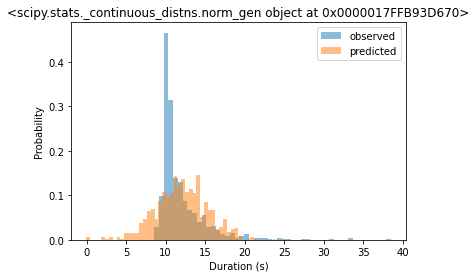

In [122]:
model = stats.norm
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = stats.norm)

## 2b) Lognormal Distribution

KS statistic: 0.10925874125874126     p-val: 0.0016088068647938877
MAE (s): 2.7381934701152586 MSE (s): 17.91847150848018


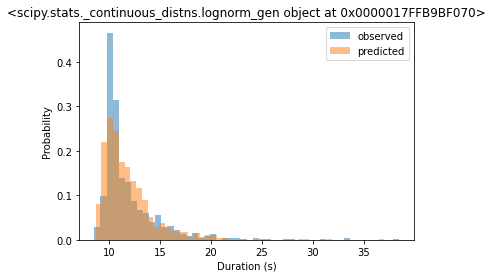

In [123]:
model = stats.lognorm
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

## 2c) Gamma Distribution

KS statistic: 0.13791608391608387     p-val: 3.0166849041113266e-05
MAE (s): 2.8058660886481785 MSE (s): 17.10331170482149


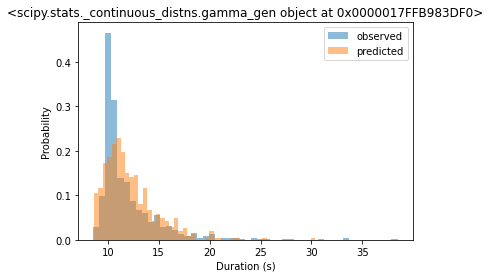

In [124]:
model = stats.gamma
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

# 3) More Distributions

## 3a) Inverse Gaussian

KS statistic: 0.11562237762237768     p-val: 0.0011084176370427614
MAE (s): 2.8231755597467467 MSE (s): 18.496267201793092


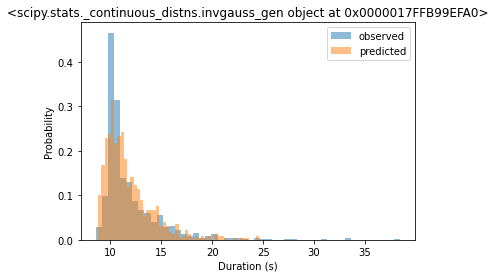

In [125]:
model = stats.invgauss
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

KS statistic: 0.09734265734265733     p-val: 0.009927806168662873
MAE (s): 2.8748074620267126 MSE (s): 28.096881400512267


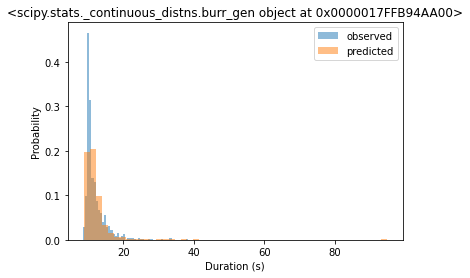

In [126]:
model = stats.burr
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

# 4) Compile all

In [127]:
#print all possible continuous distributions
possible = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
print(possible)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semici

In [128]:
#create an array of the distributions we would like to test
#Did this by removing the distributions from "possible" that could not be fitted

#dist_cont = ["norm", "lognorm", "gamma", "invgauss", "beta", "betaprime", "burr", "cauchy", "chi2", "levy"]

dist_cont = ['alpha', 'anglit', 'arcsine', 
             'argus', 'beta', 'betaprime', 
             'bradford', 'burr', 'burr12', 
             'cauchy', 'chi', 'chi2', 'cosine', 
             'crystalball', 'dgamma', 'dweibull',
             'expon', 'exponnorm', 'exponpow', 
             'exponweib', 'f', 'fatiguelife', 
             'fisk', 'foldcauchy', 'foldnorm', 
             'frechet_l', 'frechet_r', 'gamma', 
             'genextreme', 
             'gengamma', 'genhalflogistic', 'geninvgauss',
             'genlogistic', 'gennorm', 'genpareto', 
             'gilbrat', 'gompertz', 'gumbel_l', 
             'gumbel_r', 'halfcauchy', 'halfgennorm', 
             'halflogistic', 'halfnorm', 'hypsecant', 
             'invgamma', 'invgauss', 
             'johnsonsb', 'johnsonsu', 'kappa3', 
             'kappa4',
             'laplace', 'levy', 
             'levy_l', 'loggamma', 
             'logistic', 'loglaplace', 'lognorm', 
             'loguniform', 'lomax', 'maxwell', 
             'mielke', 'moyal', 'nakagami',
             'ncx2', 'norm', 'norminvgauss', 
             'pareto', 'pearson3', 'powerlaw', 
             'powerlognorm', 'powernorm', 'rayleigh', 
             'rice', 'semicircular', 'skewnorm', 't', 
             'trapz', 'triang', 'truncexpon', 'truncnorm',
             'uniform', 'vonmises', 
             'vonmises_line', 'wald', 'weibull_max', 
             'weibull_min']

n_dist = len(dist_cont)

print(n_dist)
print(dist_cont)

86
['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'laplace', 'levy', 'levy_l', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rice', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min

In [149]:
#initialise empty pd df to store
errors = pd.DataFrame(index = np.arange(n_dist),columns = ["Model","KS statistic", "KS p-value", "MAE", "MSE"])

for i, d in enumerate(dist_cont):
    print(d)
    model = getattr(sp.stats, d)
    D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit2(t_op, n_iter = 10, model = model)
    errors["Model"][i] = d
    errors["KS statistic"][i] = D_mean
    errors["KS p-value"][i] = p_mean
    errors["MAE"][i] = mae_mean
    errors["MSE"][i] = mse_mean
errors.head(10)

alpha
anglit
arcsine
argus


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


beta
betaprime


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
expon
exponnorm
exponpow
exponweib
f
fatiguelife
fisk
foldcauchy
foldnorm
frechet_l
frechet_r
gamma
genextreme
gengamma
genhalflogistic
geninvgauss
genlogistic
gennorm
genpareto
gilbrat
gompertz
gumbel_l
gumbel_r
halfcauchy
halfgennorm
halflogistic
halfnorm
hypsecant
invgamma
invgauss
johnsonsb
johnsonsu
kappa3
kappa4
laplace
levy
levy_l
loggamma
logistic
loglaplace
lognorm


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5711: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm
powernorm


C:\Users\pyliu\Documents\GOALS\Code\Wk3\update_mean.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return mean + (1/N)*(t_new - mean)


rayleigh
rice
semicircular
skewnorm
t
trapz
triang
truncexpon
truncnorm
uniform
vonmises
vonmises_line
wald
weibull_max
weibull_min


,Model,KS statistic,KS p-value,MAE,MSE
0,alpha,0.0930909,0.00466083,7.33462,29175.7
1,anglit,0.467879,7.94854e-75,8.01102,96.326
2,arcsine,0.573333,4.0127e-116,11.1053,192.365
3,argus,0.527758,1.06937e-98,9.80597,136.613
4,beta,0.172364,2.39134e-07,2.60801,15.3386
5,betaprime,0.20703,2.06935e-13,2.8204,16.1674
6,bradford,0.6,1.32608e-130,9.59533,141.262
7,burr,0.108364,0.000377341,2.82739,36.3456
8,burr12,0.0873939,0.0115133,2.87473,64.5806
9,cauchy,0.200727,1.41185e-13,6.9677,55985.7


In [136]:
#save to excel
errors.to_excel("Distributions_GOF.xlsx")
print("done")

done


# 5) What was the best?

## 5a) According to KS:

In [150]:
ks_errors = errors.sort_values("KS statistic", ascending = True)
ks_errors.head(20)

,Model,KS statistic,KS p-value,MAE,MSE
47,johnsonsu,0.0598788,0.159686,3.04822,50.0217
8,burr12,0.0873939,0.0115133,2.87473,64.5806
0,alpha,0.0930909,0.00466083,7.33462,29175.7
7,burr,0.108364,0.000377341,2.82739,36.3456
28,genextreme,0.109091,0.000724916,2.79426,38.3581
60,mielke,0.110182,0.000494585,2.72149,35.7801
44,invgamma,0.117333,0.000319919,2.59428,19.4931
31,geninvgauss,0.118303,8.24508e-05,2.69143,23.5679
22,fisk,0.119273,3.34608e-05,2.56046,19.4847
19,exponweib,0.125697,3.08542e-05,2.62265,19.114


## 5b) By MAE

In [151]:
mae_errors = errors.sort_values("MAE", ascending = True)
mae_errors.head(15)

,Model,KS statistic,KS p-value,MAE,MSE
61,moyal,0.200727,1.37908e-11,2.39688,13.6226
32,genlogistic,0.213091,2.74414e-15,2.46128,13.6761
38,gumbel_r,0.215636,5.30958e-13,2.48162,13.9189
29,gengamma,0.155758,1.93694e-07,2.53026,15.7072
17,exponnorm,0.177455,2.25663e-09,2.53647,15.0117
46,johnsonsb,0.143152,3.07774e-06,2.5462,16.3017
22,fisk,0.119273,3.34608e-05,2.56046,19.4847
55,loglaplace,0.232364,1.25205e-16,2.57812,15.9722
44,invgamma,0.117333,0.000319919,2.59428,19.4931
67,pearson3,0.188606,1.28703e-10,2.59627,15.0428


## 5c) Distributions at the top of both lists
- exponweib (7,7)
- invgamma (14,8)
- f (15,9)
- powerlognorm (8,12)
- mielke (5,14)
- lognorm (6,15)

KS statistic: 0.6076643356643354     p-val: 6.564441407558247e-112
MAE (s): 3.168903523303145 MSE (s): 22.764058315159676


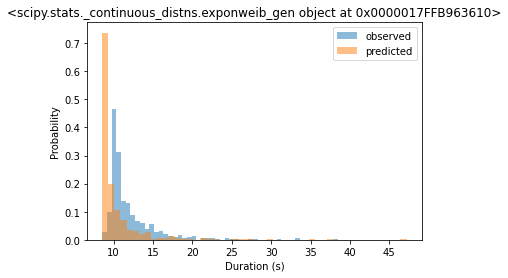

In [139]:
model = stats.exponweib
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KS statistic: 0.0965734265734266     p-val: 0.009317316229787043
MAE (s): 2.819491673811697 MSE (s): 21.47365377849117


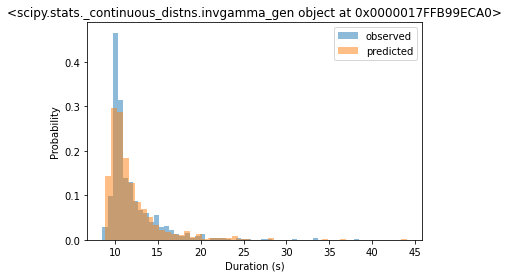

In [140]:
model = stats.invgamma
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

KS statistic: 0.09546853146853143     p-val: 0.007290556604833103
MAE (s): 2.8276077572459397 MSE (s): 22.240672523689998


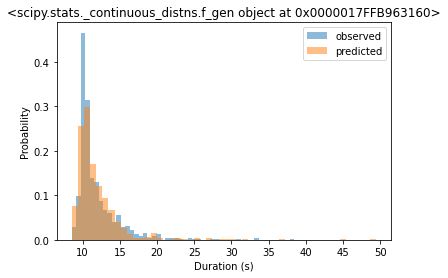

In [141]:
model = stats.f
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

KS statistic: 0.10704895104895105     p-val: 0.0024325074118814053
MAE (s): 2.7786130221458394 MSE (s): 18.902712775657722


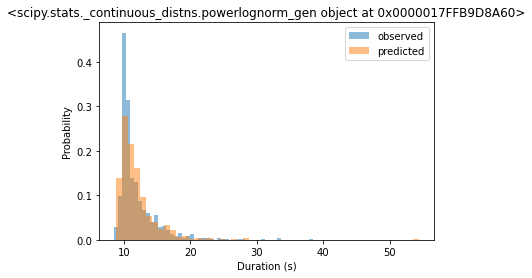

In [142]:
model = stats.powerlognorm
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

KS statistic: 0.0876923076923077     p-val: 0.022638056886510455
MAE (s): 2.8620398519324364 MSE (s): 37.23247094541183


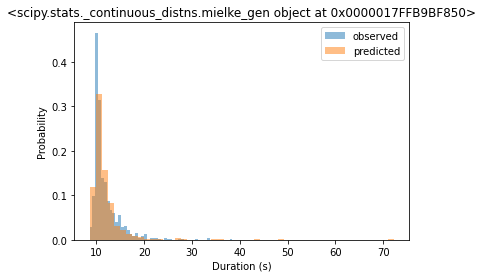

In [143]:
model = stats.mielke
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)

KS statistic: 0.11062937062937059     p-val: 0.0016226781801572444
MAE (s): 2.7651592803305527 MSE (s): 18.16890865142156


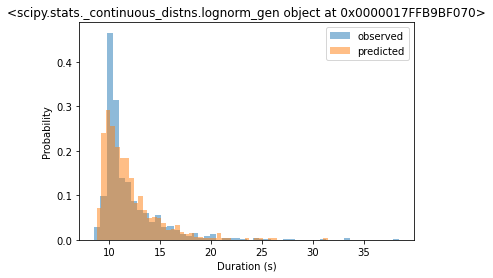

In [144]:
model = stats.lognorm
D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit(t_op, n_iter = 100, model = model)